# Milestone

##### Nama: Andrian Tanjung
##### Batch: HCK-004



## Identifikasi Masalah
### Topik Permasalahan
##### Seberapa besar pengaruh aktifitas sehari-hari terhadap kualitas tidur
### Problem Statement
##### Mengetahui seberapa besar pengaruh penggunaan gadget dan beraktifitas cardiovascular terhadap fase tidur REM
### Latar Belakang Masalah
##### Jaman sekarang gadget handphone dan smartwatch sudah menjadi hal yang diterima untuk mengukur aktifikas sehari-hari seperti langkah, jarak, detak jantung dan lamanya tidur. Didalam tidurpun terdapat beberapa fase yang penting untuk perlu dicapai untuk mendapatkan kualitas tidur yang baik. Maka dari itulah hasil data yang didapat dari 24 orang ini berdasarkan handphone dan smartwatch dijadikan bahan kajian untuk mengetahui seberapa besarnya pengaruh menatap layar handphone dan melakukan aktifitas yang berhubungan dengan perubahan detak jantung mempengaruhi kualitas tidur.
### Penjabaran Masalah
##### - Berapa rata-rata calories dan waktu bermain handphone dari masing-masing orang dalam satu minggu?
##### - Seberapa banyak individu yang tergolong active dan bagaimana penyebaran data step count?
##### - Bagaimana korelasi total tidur dari individu yang berstatus active dengan lamanya penggunaan gadget?
##### - Bagaimana perbandingan total waktu tidur yang dikelompokan berdasarkan category dalam 1 minggu?
##### - Di hari apa orang paling banyak menggunakan hpnya dan berapa lama rata-rata per individu menggunakan handphonenya?
##### - Bagaimana korelasi masing-masing calorie, steps, dan total phone usage dengan REM duration? Apa perbedaannya dengan total sleep? * sns heatmap or scatter
##### - Buatlah sebuah hipotesis dari insight no.6 dengan menggunakan critical value sebesar 0.1 
### Link URL untuk dashboard
##### https://public.tableau.com/app/profile/andrian5182/viz/milestones_16771450599950/Dashboard1?publish=yes

### Import Pustaka

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


### Data Loading

In [45]:
df = pd.read_csv("B.HEALTH classification.csv")
df.sample(5)

,subject,day,step count,distance travelled (km),calories burnt (kcal),acive time (minutes),actual sleep duration (minutes),sleep onset latency (minutes),duration in bed (minutes),efficiency (%),...,deep sleep duration (minutes) (minutes),REM duration (minutes),awake percentage (%),light sleep percentage (%),deep sleep percentage (%),REM percentage (%),total phone usage / day (minutes),night time phone usage / day (minutes),phone unlock count / day,label
139,NaN,7,1072,0.98,23,19,352,12.0,376,93.62,...,31,80.25,6.38,64.03,8.24,21.34,274,211,42,1
69,NaN,7,3215,2.24,151,31,429,12.5,454,94.49,...,59,97.50,5.51,64.43,13.00,21.48,348,330,154,0
104,NaN,7,11670,10.54,885,164,291,11.5,314,92.68,...,18,84.00,7.32,60.19,5.73,26.75,712,614,57,1
119,18.0,1,2180,1.38,54,21,470,18.0,506,92.89,...,62,102.00,7.11,60.47,12.00,20.16,165,63,69,1
47,NaN,6,995,0.40,23,27,295,35.0,365,80.82,...,68,56.75,19.18,46.64,18.63,15.55,528,367,198,2


Memperlihatkan random baris berdasarkan kolom yang ada sebagai sample data yang ada seperti apa. 
##### Data yang diambil adalah dataset dari 24 orang siswa universitas yang memakai smartwatch dan smartphones selama 7 hari berturut-turut.


In [46]:
df.shape

(168, 24)

- Total baris data diatas terdapat 168
- Total kolom data diatas terdapat 24

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   subject                                  24 non-null     float64
 1   day                                      168 non-null    int64  
 2   step count                               168 non-null    int64  
 3   distance travelled (km)                  168 non-null    float64
 4   calories burnt (kcal)                    168 non-null    int64  
 5   acive time (minutes)                     168 non-null    int64  
 6   actual sleep duration (minutes)          168 non-null    int64  
 7   sleep onset latency (minutes)            168 non-null    float64
 8   duration in bed (minutes)                168 non-null    int64  
 9   efficiency (%)                           168 non-null    float64
 10  in bed time                              168 non-n

- Data mempunyai 24 kolom dan 168 entries dimana tipe-tipe kolom tersebut adalah float dan integer. 
- Terdapat null value seperti yang bisa kita lihat, namun itu akan kita tangani di langkah data cleaning. 
- Bisa kita lihat jg day disini berupa integer yang hanya merupakan representasi setiap harinya, dimana nanti akan kita buat klom baru yang memperesentasikan tanggal untuk dapat lebih mudah di visualisasikan

In [48]:
pd.set_option("display.precision", 2)
## membuat semua data hanya mempunyai 2 digit angka dibelakang coma

Terdapat banyak data float yang akan kita buat untuk menampilkan 2 angka di belakang koma saja.

### Data Pre-processing

In [49]:
df.isna().sum()
## melihat jumlah missing value

subject                                    144
day                                          0
step count                                   0
distance travelled (km)                      0
calories burnt (kcal)                        0
acive time (minutes)                         0
actual sleep duration (minutes)              0
sleep onset latency (minutes)                0
duration in bed (minutes)                    0
efficiency (%)                               0
in bed time                                  0
out bed time                                 0
in bed awake duration (minutes)              0
light sleep duration (minutes)               0
deep sleep duration (minutes) (minutes)      0
REM duration (minutes)                       0
awake percentage (%)                         0
light sleep percentage (%)                   0
deep sleep percentage (%)                    0
REM percentage (%)                           0
total phone usage / day (minutes)            0
night time ph

In [50]:
df.duplicated().sum()
## melihat jumlah duplikat

0

Terdapat 144 null value dan tidak ada duplikat dalam data tersebut.

In [51]:
df.fillna(method="ffill", inplace=True)
## mengisi missing value dengan value sebelumnya

In [52]:
df['subject'].isna().sum()
## memastikan bahwa missing value sudah teratasi

0

 Sekarang missing value sudah tidak ada. Selain kolom "subject" tidak ada terdapat missing value. Disini missing value diisi dengan value sebelumny, karena data tersebut dilakukan oleh orang yang sama selama 7x.

### Exploratory Data Analysis

Sebelum memulai analysis, perlu diketahui bahwa beberapa kolom dapat diabaikan dan beberapa terms untuk lebih mengerti kenapa beberapa data tersebut tidak begitu relevan.
 - "active time" = waktu yang diukur ketika berada di fat burn zone (>125 bps)
 - "duration time in bed" = waktu yang dihabiskan ketika minimum 1 jam tidak melakukan aktifitas
 - "sleep onset latency" = seberapa cepat tidur setelah mematikan lampu atau meletakan hanphone

Dari data yang tersedia, kita juga dapat memasukkan beberapa pengelompokan yang didasarkan penelitian ilmiah


In [53]:
df.drop(columns=['sleep onset latency (minutes)', 'efficiency (%)', 'in bed time', 'out bed time', 'in bed awake duration (minutes)', 'awake percentage (%)','night time phone usage / day (minutes)', 'phone unlock count / day', 'label'], inplace=True)
## membuang beberapa kolom yang tidak dipakai dalam analisa

In [54]:
conditions = [
    (df['step count'] < 6000),
    (df['step count'] >= 6000)
]
values =  ['not active', 'active']
df['person type'] = np.select(conditions, values)
## membuat kolom baru berdasarkan jumlah kalorie dalam sehari

In [55]:
conditions = [
    (df['actual sleep duration (minutes)'] < 360),
    (df['actual sleep duration (minutes)'] > 480),
    (df['actual sleep duration (minutes)'] >= 360) & df['actual sleep duration (minutes)'] <= 480
]
values =  ['bad', 'over', 'good']
df['sleep status'] = np.select(conditions, values)
## membuat kolom baru berdasarkan total waktu tidur

In [56]:
conditions = [
    (df['REM percentage (%)'] < 20),
    (df['REM percentage (%)'] > 25),
    (df['REM percentage (%)'] >= 20) & df['actual sleep duration (minutes)'] <= 25
]
values =  ['less', 'perfect', 'too much']
df['REM quality'] = np.select(conditions, values)
## membuat kolom baru berdasarkan  REM%

In [57]:
df

,subject,day,step count,distance travelled (km),calories burnt (kcal),acive time (minutes),actual sleep duration (minutes),duration in bed (minutes),light sleep duration (minutes),deep sleep duration (minutes) (minutes),REM duration (minutes),light sleep percentage (%),deep sleep percentage (%),REM percentage (%),total phone usage / day (minutes),person type,sleep status,REM quality
0,1.0,1,3016,2.28,2151,32,455,518,270.0,65,125.0,57.00,12.55,24.00,730,not active,good,too much
1,1.0,2,1790,1.39,2129,19,320,360,150.0,120,50.0,41.60,33.30,13.80,532,not active,bad,less
2,1.0,3,2864,2.07,2032,29,453,504,267.0,56,135.0,54.00,11.11,26.00,699,not active,good,perfect
3,1.0,4,1419,1.80,1713,15,449,518,258.0,54,140.0,51.00,10.42,27.00,729,not active,good,perfect
4,1.0,5,1698,1.30,1725,18,358,403,211.0,56,94.0,54.00,13.90,23.00,850,not active,bad,too much
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,24.0,3,6752,4.59,222,67,570,575,352.5,100,117.5,61.30,17.39,20.43,130,active,over,too much
164,24.0,4,6207,3.89,201,61,535,546,360.0,55,120.0,65.93,10.07,21.98,126,active,over,too much
165,24.0,5,6202,4.21,204,67,480,480,345.0,20,115.0,71.88,4.17,23.96,215,active,good,too much
166,24.0,6,1011,0.23,19,21,300,365,201.0,32,67.0,55.07,8.77,18.36,467,not active,bad,less


Sekarang kita mempunyain data yang diperlukan untuk analisa data. Jumlah entries masih tetap sama, namun sekarang jumlah kolom menjadi 18, dimana 3 diantaranya adalah kolom pengelompokan baru yang berdasarkan yang didukung oleh penelitian ilmiah. (referensi ilmiah di taruh di bagian paling bawah)

Mari kita explorasi data yang kita punya!!

### Jawaban dari Masalah
##### 1. Berapa rata-rata calories, waktu tidur dan waktu bermain handphone dari masing-masing orang dalam satu minggu?

In [58]:
mean_cal_burnt = df.groupby(['subject'])[['calories burnt (kcal)']].mean().sort_values(by='calories burnt (kcal)', ascending=False)
# melihat rata-rata kalorie yang dikeluarkan per orang dalam 1 minggu
mean_cal_burnt

,calories burnt (kcal)
subject,
13.0,1900.71
1.0,1752.57
12.0,1410.00
2.0,1314.43
15.0,935.57
14.0,894.00
3.0,645.57
16.0,447.14
23.0,316.14


Text(0, 0.5, 'calorie')

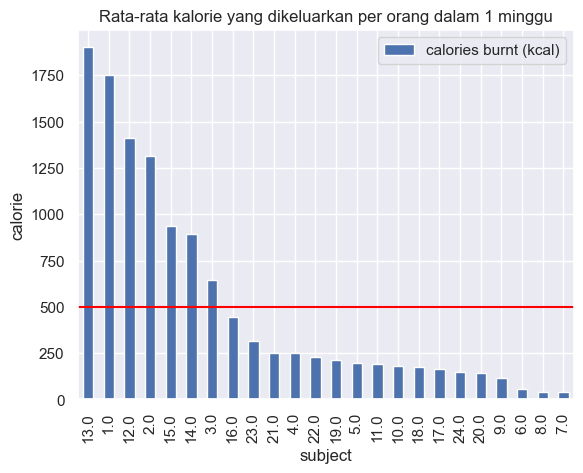

In [59]:
mean_cal_burnt.plot(kind='bar')
## memunculkan visualisasi bar
plt.title('Rata-rata kalorie yang dikeluarkan per orang dalam 1 minggu')
## memberikan title pada visualisasi
plt.axhline(df['calories burnt (kcal)'].mean(), color='red')
## memunculkan garis rata-rata
plt.ylabel("calorie")
## memunculkan tulisan di sumbu Y


Melihat rata-rata kalorie yang dibakar oleh setiap individu dalam seminggu. Dapat dilihat beberapa individu sangatlah aktif membakar kalorie dan beberapa orang individu dapat disimpulkan kurang melakukan aktifitas cardio karena dalam seminggu angka yang didapatkan bahkan kurang dari 100 kalorie.

In [60]:
mean_phone_usage =  df.groupby(['subject'])[['total phone usage / day (minutes)']].mean().sort_values(by='total phone usage / day (minutes)', ascending=False)
## melihat rata-rata lama penggunaan hp per orang dalam 1 minggu
mean_phone_usage

,total phone usage / day (minutes)
subject,
3.0,1108.71
14.0,927.57
2.0,908.86
12.0,819.00
15.0,777.57
1.0,767.14
13.0,671.71
4.0,565.86
7.0,511.57


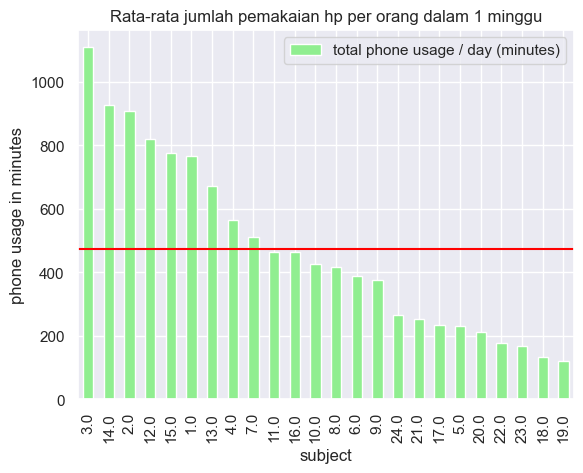

In [61]:
mean_phone_usage.plot(kind='bar',color='lightgreen')
## memunculkan visualisasi bar
plt.title('Rata-rata jumlah pemakaian hp per orang dalam 1 minggu')
## memberikan title pada visualisasi
plt.ylabel('phone usage in minutes')
## memnuculkan tulisan di sumbu Y
plt.axhline(df['total phone usage / day (minutes)'].mean(), color='red')

Berdasarkan 24 individu, pemakaian handphone mereka sangat beragam. Minimum 2 jam setiap harinya setiap individu menggunakan handphonenya, dan bahkan ada individu 3 yang menghabiskan 18,5 jam menggunakan handphone setiap harinya. Sekilas karena hal tersebut saya mencoba melihat individu nomor 3 dan terdapat hal yang janggal dari rata-rata penggunan hp dan rata-rata tidur dari invididu 3, dimana rata-rata bermain hpnya 18,5 jam dan rata-rata tidur 8 jam, dimana jika dijumlahkan total waktu lebih dari 24 jam. Karena keterbatasan data yang ada, kita hanya dapat menyimpulkan sesuatu seperti tidak akuratnya pengambilan data.

### Jawaban dari Masalah
##### 2. Seberapa banyak individu yang tergolong active dan bagaimana penyebaran data step count?

In [62]:
df[
    (df['person type'] == 'active') |
    (df['person type'] == 'not active')
].groupby(['subject','person type'])[['person type']].count()
## melihat active tidaknya per orang 

person type
subject person type             
1.0     not active             7
2.0     not active             7
3.0     active                 7
4.0     active                 4
        not active             3
5.0     active                 7
6.0     not active             7
7.0     not active             7
8.0     not active             7
9.0     not active             7
10.0    active                 1
        not active             6
11.0    not active             7
12.0    active                 4
        not active             3
13.0    active                 5
        not active             2
14.0    active                 7
15.0    active                 7
16.0    active                 7
17.0    active                 2
        not active             5
18.0    active                 4
        not active             3
19.0    active                 7
        not active             1
20.0    active                 3
        not active             4
21.0    active                 4
        not active             3
22.0    active                 3
        not active             4
23.0    active                 5
        not active             2
24.0    active                 4
        not active             2

Terdapat 15 orang yang tergolong aktif jika dikelompokan dalam 1 minggu, dimana setidaknya lebih dari 3 hari dalam 1 minggu invidu tersebut berjalan lebih dari 24000 langkah yang dikategorikan sebagai individu yang aktif. (mempunyai status active = 4)

Dapat dilihat terdapat anomali data pda individu 19 dan 24 dimana entries individu 19 melebihi 7 dan individu 24 kurang dari 7, mari kita lihat lebih lanjut

In [63]:
df[
    (df['subject'] == 19) |
    (df['subject'] == 24)
]
## melihat subject individu 19 dan 24

,subject,day,step count,distance travelled (km),calories burnt (kcal),acive time (minutes),actual sleep duration (minutes),duration in bed (minutes),light sleep duration (minutes),deep sleep duration (minutes) (minutes),REM duration (minutes),light sleep percentage (%),deep sleep percentage (%),REM percentage (%),total phone usage / day (minutes),person type,sleep status,REM quality
126,19.0,1,8405,3.53,186,79,446,448,257.25,103,85.75,57.42,25.00,19.14,76,active,good,less
127,19.0,2,7043,2.95,155,69,388,390,214.50,102,71.50,55.00,29.00,18.33,166,active,good,less
128,19.0,3,8554,3.62,190,84,202,202,119.25,43,39.75,59.03,21.00,19.68,188,active,bad,less
129,19.0,4,3370,1.42,77,56,573,600,306.75,164,102.25,51.12,27.00,17.04,157,not active,over,less
130,19.0,5,11155,4.80,243,105,513,531,282.00,137,94.00,53.11,26.00,17.70,78,active,over,less
131,19.0,6,15862,7.01,355,156,358,358,207.00,82,69.00,57.82,23.00,19.27,111,active,bad,less
132,19.0,7,10361,4.70,248,117,499,512,344.25,40,114.75,67.24,8.00,22.41,86,active,over,too much
133,19.0,1,8663,3.81,230,94,347,361,211.50,65,70.50,58.59,18.00,19.53,102,active,bad,less
162,24.0,2,6874,4.67,226,69,510,515,326.25,75,108.75,63.35,14.56,21.12,94,active,over,too much
163,24.0,3,6752,4.59,222,67,570,575,352.50,100,117.50,61.30,17.39,20.43,130,active,over,too much


Dapat dilihat bahwa memang adanya suatu anomali di data entry subject 19 dan 24. Karena meminimalisir asumsi, maka data akan kita biarkan sedemikian.

In [64]:
df['step count'].mean()
## melihat rata-rata dari data step count

6225.803571428572

In [65]:
df['step count'].median()
## melihat nilai tengah dari data step count

5409.0

In [66]:
df['step count'].mode()
## melihat nilai yang paling sering muncul dari data step count

0        669
1        786
2        840
3        873
4        894
       ...  
163    15969
164    17184
165    17195
166    18398
167    20134
Name: step count, Length: 168, dtype: int64

In [67]:
df['step count'].skew()
## melihat skewness distribusi sebuah data

0.7767884286478869

c:\Users\Andrian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


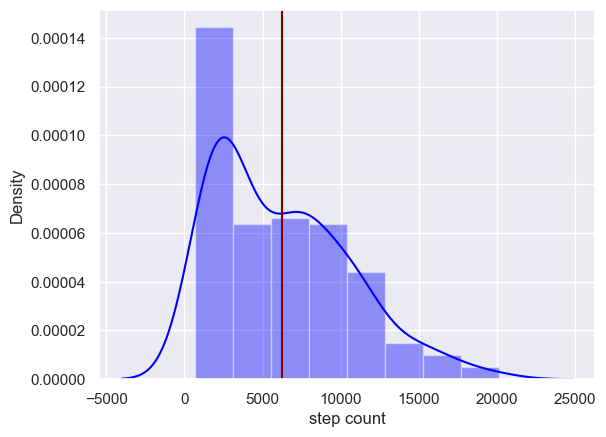

In [68]:
sns.distplot(df['step count'],color='blue')
plt.axvline(df['step count'].mean(), color='maroon')
## visualisasi penyebaran step count dan garis rata-rata penyebaran tersebut

Dari data step count dapat dilihat bahwa:
- nilai rata-rata: 6226
- nilai tengah: 5409
- modus: tidak ada modus
- penyebaran data: 0.77
Pemusatan data sedikit skew ke kiri yang mengindikasikan terdapat beberapa outliers di sebelah kanan. Dibuktikan dengan nilai skew yang positif. data berkumpul atau berpusat di sebelah kiri.

### Jawaban dari Masalah
##### 3. Bagaimana korelasi total tidur dari individu yang berstatus active dengan lamanya penggunaan gadget?

In [69]:
groupA = df[
    (df['person type'] == 'active')
].groupby(['subject', 'person type'])[['actual sleep duration (minutes)', 'total phone usage / day (minutes)']].sum()
## mengelompokan individu yang berstatus active dan waktu tidurnya
groupA

,,actual sleep duration (minutes),total phone usage / day (minutes)
subject,person type,,
3.0,active,3355,7761
4.0,active,1934,1754
5.0,active,3163,1621
10.0,active,550,221
12.0,active,1215,3208
13.0,active,1901,3304
14.0,active,3129,6493
15.0,active,2011,5443
16.0,active,2988,3244


In [70]:
groupB = df[
    (df['person type'] == 'active')
].groupby(['subject', 'person type'])[['total phone usage / day (minutes)']].sum()
## mengelompokan individu yang berstatus active dan penggunaan gadgetnya

In [71]:
stats.pearsonr(groupA['actual sleep duration (minutes)'], groupB["total phone usage / day (minutes)"])[0]
## korelasi Pearson

0.5562449609116927

Dari korelasi pearson dapat disimpulkan bahwa korelasi antara lama tidur dan lamanya penggunaan gadget dari orang yang active adalah 55% dan berarah positif. Dimana dapat disimpulkan bahwa orang yang termasuk active, jika lebih lama menggunakan gadget akan mempengaruhi sedikitnya bertambah pula waktu tidurnya dan vice versa. 

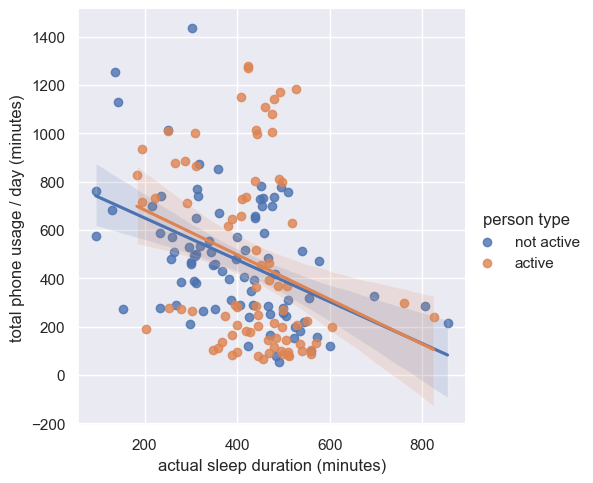

In [75]:
sns.lmplot(data=df, x='actual sleep duration (minutes)', y='total phone usage / day (minutes)', hue='person type')

### Jawaban dari Masalah
##### 4. Bagaimana perbandingan total waktu tidur yang dikelompokan berdasarkan category dalam 1 minggu?

In [ ]:
df.groupby(['sleep status'])[['actual sleep duration (minutes)']].count()

,actual sleep duration (minutes)
sleep status,
bad,54
good,66
over,48


Dari 24 individu yang tidur selama 1 minggu
- 39.3% dari total tidur merupakan tidur yang cukup
- 28.6% dari total tidur merupakan tidur yang melebihi batas normal
- 32.1% dari total tidur merupakan tidur yang kurang

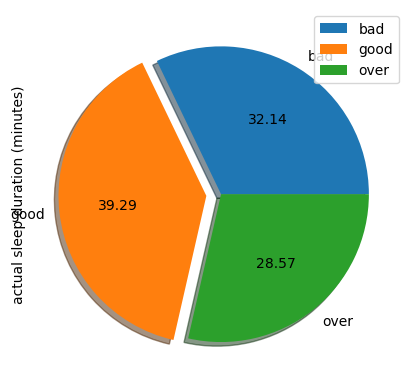

In [ ]:
myexplode = [0.2, 0, 0]
## membuat variable untuk visualisasi
grup = df.groupby(['sleep status'])[['actual sleep duration (minutes)']].count().plot(kind='pie', subplots=True, explode=[0,0.1,0], shadow=True, autopct='%.2f')
## visualisasi pie chart

### Jawaban dari Masalah
##### 5. Di hari apa orang paling banyak menggunakan hpnya dan berapa lama rata-rata per individu menggunakan handphonenya?

In [ ]:
df.groupby(['day'])[['total phone usage / day (minutes)']].sum()
## melihat total penggunaan handphone di setiap harinya

,total phone usage / day (minutes)
day,
1,10540
2,11236
3,11365
4,10799
5,12728
6,11754
7,11172


<AxesSubplot:xlabel='day', ylabel='total phone usage / day (minutes)'>

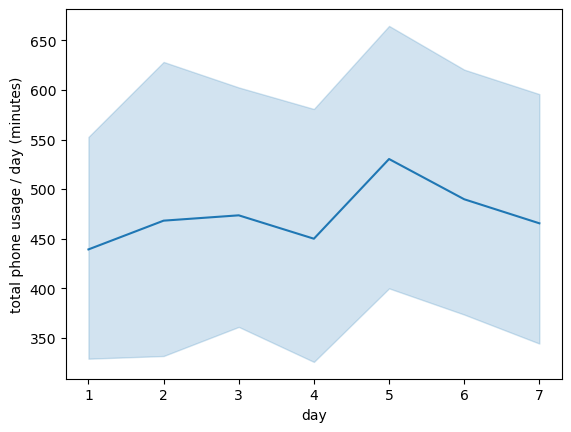

In [ ]:
sns.lineplot(x=df['day'],y=df['total phone usage / day (minutes)'])
## membuat visualisasi lineplot

Pada hari ke 5 atau diasumsikan hari Jumat para individu paling lama menggunakan hanphonenya. 

In [ ]:
df.groupby(['subject'])[['total phone usage / day (minutes)']].mean().mean()
## melihat rata-rata penggunaan handphone pada hari Jumat

total phone usage / day (minutes)    474.65
dtype: float64

Rata-rata lama setiap individu menggunakan handphonenya adalah 8jam 15menit setiap harinya.

### Jawaban dari Masalah
##### 6. Bagaimana korelasi masing-masing calorie, steps, dan total phone usage dengan REM duration? Apa perbedaan dengan total sleep?

In [ ]:
corr = df[['step count','calories burnt (kcal)','total phone usage / day (minutes)','REM percentage (%)','actual sleep duration (minutes)']].corr()
corr
## correlation dari setiap variable

,step count,calories burnt (kcal),total phone usage / day (minutes),REM percentage (%),actual sleep duration (minutes)
step count,1.00,0.17,-0.12,0.29,0.16
calories burnt (kcal),0.17,1.00,0.52,0.22,-0.28
total phone usage / day (minutes),-0.12,0.52,1.00,0.30,-0.35
REM percentage (%),0.29,0.22,0.30,1.00,0.10
actual sleep duration (minutes),0.16,-0.28,-0.35,0.10,1.00


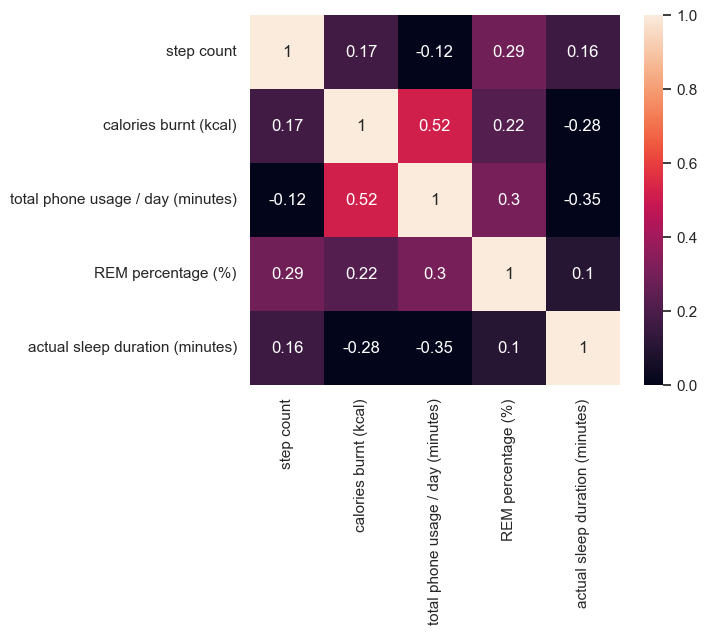

In [ ]:
sns.set()
ax = sns.heatmap(df[['step count','calories burnt (kcal)','total phone usage / day (minutes)','REM percentage (%)','actual sleep duration (minutes)']],vmin=0, vmax=1)
ax1 = sns.heatmap(corr, cbar=0, square=True,vmin=0, vmax=1, annot=True)
## membuat visualisasi heatmap dari variable-variable yang dipilih

Hubungan step count, calories, dan penggunaan handphone terhadap REM dapat disimpulkan bahwa tidak terdapat korelasi yang kuat. Contohnya, melakukan aktifitas cardio yang membuat step count dan calories burnt bertambah dan penggunaan handphone dalam sehari-hari tidak banyak pengaruh terhadap REM (rapid eye movement) ketika individu tersebut tidur.

Tidak terdapat hubungan step count dengan waktu tidur. Namun calories dan penggunaan handphone terhadap waktu tidur disimpulkan tidak terdapat korelasi yang kuat namun berarah negatif. Contohnya, semakin banyak kalorie dikeluarkan dan penggunaan gadget akan berdampak kurang nya waktu tidur, namun tidak begitu banyak.

### Jawaban dari Masalah
##### 7. Buatlah sebuah hipotesis dari insight no.6 dengan menggunakan critical value sebesar 0.1

Hypothesis Testing 2 sample 1 tail
* H0 = REM quality(perfect) total phone usage's mean <= REM quality(less) total phone usage's mean
* H1 = REM quality(perfect) total phone usage's mean > REM quality(less) total phone usage's mean
---
atau bahasa sederhanya
* Hipotesa dasar mengatakan bawha kelompok individu dengan REM quality perfect bermain gadget lebih besar atau sama dengan kelompok indvidu yang tergolong REM quality buruk
* Hipotesa yang ingin di buktikan mengatakan bahwa kelompok individu dengan REM quality perfect bermain gadget lebih sedikit dari  kelompok indvidu yang tergolong REM quality buruk


In [ ]:
perfect = df[
    (df['REM quality'] == 'perfect')
]
## mengelompokan indvidu berdasarkan REM quality yang 'baik'

Nilai rata-rata dari total penggunaan gadget dari kelompok individu yang tergolong mempunyai REM qualitas baik adalah 952 menit

In [ ]:
less = df[
    (df['REM quality'] == 'less')
]
## mengelompokan indvidu berdasarkan REM quality yang 'kurang'

Nilai rata-rata dari total penggunaan gadget dari kelompok individu yang tergolong mempunyai REM qualitas kurang adalah 470 menit

In [ ]:
t_stat,p_value = stats.ttest_ind(perfect['total phone usage / day (minutes)'],less['total phone usage / day (minutes)'])
p_value
## mendapatkan p-value

9.51084724463341e-12

Dilihat bahwa p_value lebih kecil dari 0.1, maka dapat disimpulkan bahwa H0 reject, atau dapat dikatakan bahwa terdapat pengaruh yang signifikan dari lamanya bermain hp dengan qualitas REM yang akan didapat pada saat tidur

c:\Users\Andrian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Andrian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


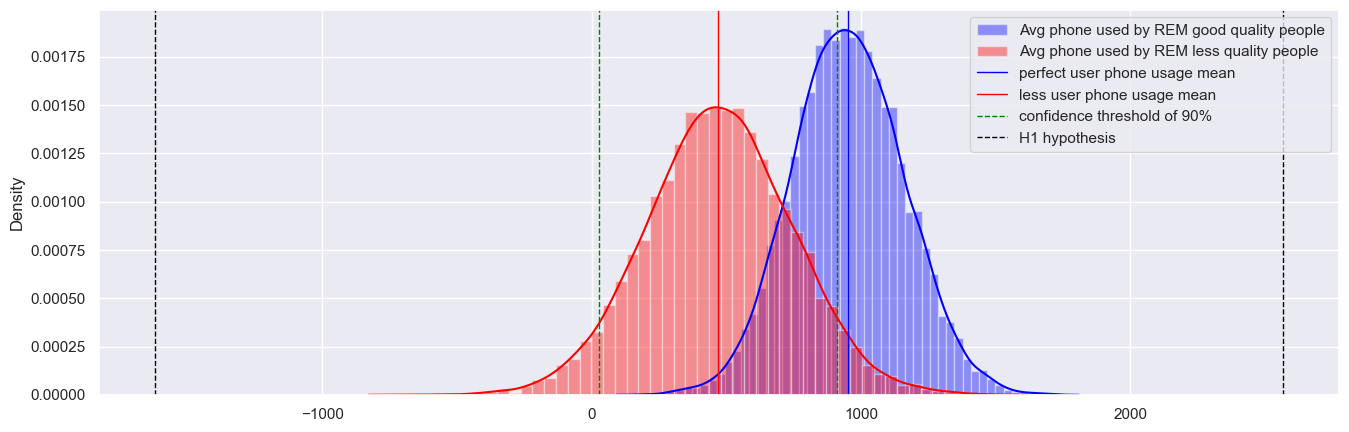

In [ ]:
random_perfect = np.random.normal(perfect['total phone usage / day (minutes)'].mean(), perfect['total phone usage / day (minutes)'].std(), 10000)
random_less = np.random.normal(less['total phone usage / day (minutes)'].mean(),less['total phone usage / day (minutes)'].std(),10000)
## memnbuat random sample

ci = stats.norm.interval(0.90, less['total phone usage / day (minutes)'].mean(), less['total phone usage / day (minutes)'].std())
plt.figure(figsize=(16,5))
sns.distplot(random_perfect, label='Avg phone used by REM good quality people',color='blue')
sns.distplot(random_less, label='Avg phone used by REM less quality people',color='red')
## membuat visualisasi 2 sample

plt.axvline(perfect['total phone usage / day (minutes)'].mean(), color='blue', linewidth=1, label='perfect user phone usage mean')
plt.axvline(less['total phone usage / day (minutes)'].mean(), color='red',  linewidth=1, label='less user phone usage mean')
## membuat garis rata-rata

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=1, label='confidence threshold of 90%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=1)
## membuat garis confidence interval

plt.axvline(random_less.mean()+t_stat*random_less.std(), color='black', linestyle='dashed', linewidth=1, label = 'H1 hypothesis')
plt.axvline(random_less.mean()-t_stat*random_less.std(), color='black', linestyle='dashed', linewidth=1)
## membuat garis hipotesis

plt.legend()


Dapat dilihat dari visualisasi diatas dimana H1 teori hipotesis berada sangat jauh dari confidence interval, dimana menandakan adanya perbedaan yang signifikan.

### Kesimpulan
- Beberapa individu sangatlah aktif dalam membakar kalorie dan beberapa individu sangatlah tidak aktif, berdasarkan jumlah kalorie yang terukur oleh gadget, bahkan kurang dari 100 pembakaran kalorie dalam 1 minggu. 
- Setiap individu menggunakan gadget nya minimum 2 jam dalam sehari
- Korelasi total tidur dari individu yang berstatus active dengan lamanya penggunaan gadget adalah berarah sama dan sebesar 55%. Jika individu tidur lebih lama, maka ada 55% kenaikan pada penggunaan gadget dan vise versa.
- Dalam 7 hari waktu tidur, 39.3% dari total tidur tersebut adalah tidur yang cukup.
- Pada hari ke 5 atau hari Jumat adalah hari paling lama para individu memainkan hpnya, dimana rata-rata para individu menghabiskan 8jam 15menit menggunakan gadget.
- Hubungan step count, calories, dan penggunaan handphone terhadap REM dapat disimpulkan bahwa tidak terdapat korelasi yang kuat, yang dimana artinya jika individu melakukan aktifitas cardio yang membuat step count dan calories burnt bertambah dan penggunaan handphone dalam sehari-hari tidak banyak pengaruh terhadap REM (rapid eye movement) ketika individu tersebut tidur.
- Tidak terdapat hubungan step count dengan waktu tidur. Namun calories dan penggunaan handphone terhadap waktu tidur disimpulkan tidak terdapat korelasi kecil namun berarah negatif, dimana semakin banyak kalorie dikeluarkan dan penggunaan gadget akan berdampak kecil pada kurang nya waktu tidur.
- Berdasarkan hasil hipotesis, terdapat pengaruh yang signifikan dari lamanya bermain hp dengan qualitas REM yang akan didapat pada saat tidur